In [1]:
###########################################################
###########################################################
###########################################################

## 自变量 挖矿节点 难度目标
## 因变量 出块时间

## 目标：找到一组合适的 PID 参数，使得每挖一个块，做一次难度调节
##      使得连续生成 1000 个块的方差较小
##      多组PID参数做比较 原始难度调整策略做比较

## 使用hash算法 sha1, 一共 160位，难度前导0最多159位

## 目标挖矿平均时间 60s， 记录每个新块的产生时间

## CPU: 2.3 GHz Intel Core i9, 8 - core, use muti-process to simulate the mining nodes

## the root hash of merkle tree is selected by random.

###########################################################
###########################################################
###########################################################

In [2]:
## Support Functions
import hashlib
def sha1(obj: str):
    return hashlib.sha1(str(obj).encode('utf-8')).hexdigest()

In [3]:
## Block
class Block:
    duration = 0
    
    def __init__(self, height, pre_hash, merkle, nouce, transactions):
        self.height = height
        self.pre_hash = pre_hash
        self.merkle = merkle
        self.nouce = nouce
        self.transactions = transactions

    def getHash(self):
        return sha1(self)
    
    def __repr__(self):
        return str(self.pre_hash) + str(self.height) + str(self.merkle) + str(self.nouce)
    
    def printJSON(self):
        # DFS or BFS
        print("Hash:", self.getHash(), "Height:", self.height, "Pre_Hash:", self.pre_hash, "Merkle Hash:", self.merkle, "nouce:", self.nouce)
        pass

In [4]:
## mine difficaulty
## 40 - 4 = 36
## hash value should smaller than DIFFICULTY
DIFFICULTY = 0x0000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF
print('Mine DIFFICULTY:', DIFFICULTY)
len("000000FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF")
# 5000000000000000000000000000000000000000000
# 22300745198530623141535718272648361505980415

Mine DIFFICULTY: 22300745198530623141535718272648361505980415


40

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def visualization(blocks):
    x = range(len(blocks))
    y = [block.duration for block in blocks]
    x_standard = range(len(blocks))
    y_standard = [60 for i in x_standard]
    plt.figure(figsize=(8,4)) 
    l1=plt.plot(x,y,'r--',label='Mining')
    l2=plt.plot(x_standard,y_standard,'g--',label='Standard')
    plt.plot(x,y,'ro-',x_standard,y_standard,'g+-')
    plt.xlabel("Height")
    plt.ylabel("Time(s)")
    plt.legend()
    plt.title("Time Analysis")

# visualization([{"duration": 12},{"duration": 40}])

In [8]:
## PID ajustment
## U(t) = Kp*error(t) + Ki*integration(error(t)) + Kd*(error(t) - error(t-1))
## Initialize kp = 1.5  Ki = 1 Kd = 1, more epochs to find the best coefficient
## target = 60s
## error(t) = 60s - real_time
## new_Diffculty = old_Diffculty + U(t)
## old_Difficulty = 5 means 00000 + FFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFFF

import math
kp = 5000000000000000000000000000000000000000
ki = 1000000000000000000000000000000000000
kd = 1000000000000000000000000000000000000
difficulties = [DIFFICULTY]
# kp = 0.5, ki = 0.2, kd = 0.1
# kp = 0.5, ki = 0.3, kd = 0.1
# kp = 0.5, ki = 0.4, kd = 0.1

def adjustmentDifficulty(old_Difficulty,height):
    old_Difficulty = math.log2(old_Difficulty)
    print("old_Difficulty:",old_Difficulty)
    ut = kp*errors[height] + ki*errors_sum + kd*(errors[height] - errors[height-1])
    print("ut:", ut) 
    new_Difficulty = old_Difficulty - ut
    print("new_Difficulty:",new_Difficulty)
    return math.pow(2,  new_Difficulty)  

def adjustmentDifficulty2(old_Difficulty,height):
    ut = kp*errors[height] + ki*errors_sum + kd*(errors[height] - errors[height-1])
    new_Difficulty = old_Difficulty - ut
    print('********************************************************')
    print('New Difficulty: ', new_Difficulty, 'Difficulty cahnge: ', ut, ' errors: ', errors[height], ' errors_sum: ', errors_sum)
    print('********************************************************')
    difficulties.append(new_Difficulty)
    return new_Difficulty

# print(adjustmentDifficulty(DIFFICULTY)，1)
    

Epoch 1, Parent process 75489, mining...
Hash: 0000b2c03cdc5df82674062a95f011849f89afa3 Height: 1 Pre_Hash: 0 Merkle Hash: 6540f6242d062e8453feb51d7360470172a49d9b nouce: 7378697629483846528
duration time: 3.437793
errors [0, 56.562207] errors_sum 56.562207
********************************************************
New Difficulty:  2.1397345963921626e+43 Difficulty cahnge:  2.8292415941399997e+41  errors:  56.562207  errors_sum:  56.562207
********************************************************
Epoch 2, Parent process 75489, mining...
Hash: 00007d73253f00138e2b625502885e7d4bc2d887 Height: 2 Pre_Hash: 0000b2c03cdc5df82674062a95f011849f89afa3 Merkle Hash: 80e09a269ffe9de2f6fdea9b7de4b8ae18b707fd nouce: 768614336404565521
duration time: 0.393226
errors [0, 56.562207, 59.606774] errors_sum 116.168981
********************************************************
New Difficulty:  2.1099192880373625e+43 Difficulty cahnge:  2.9815308354800003e+41  errors:  59.606774  errors_sum:  116.168981
********

duration time: 1.295623
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377] errors_sum 810.246556
********************************************************
New Difficulty:  1.7622927476735625e+43 Difficulty cahnge:  2.9433334508500003e+41  errors:  58.704377  errors_sum:  810.246556
********************************************************
Epoch 15, Parent process 75489, mining...
Hash: 0000a05dca0d11e01937559d66b91fb9e83e8a3b Height: 15 Pre_Hash: 000000db556748b19a2be17af6db1b0e1a6a5301 Merkle Hash: ab5f9011e0dc62544fa0ce58b362c7995789ff08 nouce: 5534023222112893299
duration time: 7.107395
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605] errors_sum 863.1391610000001
**************************************************

Hash: 00008cd6a0058401e22b61e0e9d1cd95fb242e4a Height: 25 Pre_Hash: 00004e063161002e8f5ab5d41e01075da32b1a02 Merkle Hash: 50ee5d69b3dc65a6eaf851616be84dd7c27fa33d nouce: 3353953467947194663
duration time: 1.002345
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655] errors_sum 1451.3532370000003
********************************************************
New Difficulty:  1.4404663939160623e+43 Difficulty cahnge:  2.96439231018e+41  errors:  58.997655  errors_sum:  1451.3532370000003
********************************************************
Epoch 26, Parent process 75489, mining...
Hash: 0000091ac18cc6dda21a986a571025fa5a0e0ab4 Height: 26 Pre_Hash: 00008cd6a0058401e22b61e0e9d1cd95fb242e4a Merkle Hash: fd0cfe75941368cf5c868a4579bb4971b925b29b no

Hash: 00006b0c83b95c0b76910b6abe808bfd5f24f8c6 Height: 35 Pre_Hash: 00002e6abaeb6622d699dae00ba76cdc2a4cb09f Merkle Hash: ff0b028316dbe51f69c138990a825cb1bf8d7271 nouce: 2459565876494615496
duration time: 3.513109
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891] errors_sum 2014.9733050000002
********************************************************
New Difficulty:  1.1568962548138623e+43 Difficulty cahnge:  2.8444801364300003e+41  errors:  56.486891  errors_sum:  2014.9733050000002
********************************************************
Epoch 36, Parent process 75489, mining...
Hash: 00000cde14991bd2d6f0464a2a680d822bd75f61 Heig

Hash: 00000b2b23ce16764f242336d956223fda6be8fc Height: 44 Pre_Hash: 000006575f1628e1d394e92f49f26b1a4d1bb9b4 Merkle Hash: a803d86c08f594ad3df4583dcaa58e14362b8a92 nouce: 7686143364045682818
duration time: 5.602405
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595] errors_sum 2518.660438
********************************************************
New Difficulty:  9.029819371436624e+42 Difficulty cahnge:  2.7450897251300003e+41  errors:  54.397595  errors_sum:  2518.660438
********************************************************
Epoch 45, Pa

Hash: 00000af38f20a49b087a99c7314ffae4cb194aaa Height: 52 Pre_Hash: 000033ff177464eceaf99ebdcb87fddb3075ac10 Merkle Hash: 3429de16f71879f5ff90e56d703cf67468171b61 nouce: 3074457345618392529
duration time: 10.230694
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306] errors_sum 2953.5877880000007
********************************************************
New Difficulty:  6.833043810623624e+42 Difficulty cahnge:  2.51796520689e+41  errors:  49.76

duration time: 5.619105
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895] errors_sum 3337.0692010000002
********************************************************
New Difficulty:  4.893436135027623e+42 Difficulty cahnge:  2.75238229644e+41  errors:  54.380895  errors_sum:  3337.0692010000002
********************************************************
Epoch 60, Parent pr

Hash: 00000bf3b39379a070e3fc4df8671d0d23291934 Height: 66 Pre_Hash: 00001187829f61e127cac544b93d97bb486e3a03 Merkle Hash: 68b5eb3fdb178802748190ebb6ed948781e5c66c nouce: 4919131752989227881
duration time: 5.513068
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932] errors_sum 3716.3297159999

Hash: 0000071894c738b1e683345622dcf2b2dc475439 Height: 73 Pre_Hash: 00000bf8de49588675bf4a6df1e0335747b7dda4 Merkle Hash: d11270f240796ccecfd2dac3de47564faa56cc4a nouce: 7993589098607527356
duration time: 22.004328
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.

Hash: 0000090268db9e846def74b439289a0bd48ecb13 Height: 79 Pre_Hash: 000007ec9c47eec9b9095db93b0375df5c40b337 Merkle Hash: 4dc4e26ca10c435ed86c785737ad5bfe11aa3464 nouce: 2305843009213717617
duration time: 10.253351
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.

Hash: 0000b5b5142dcb4361286a93f775ff33d898a961 Height: 85 Pre_Hash: 000130e03d21f7b93fae2895d8e966d5ea85965b Merkle Hash: 6633a646bfe694b0b7303a981ab32a7c832541dc nouce: 6341068275337658690
duration time: 0.791268
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.1

Hash: 00001ffe0d20f29f6718a4617c17cf24d19c03bd Height: 91 Pre_Hash: 0000259e31ce358c62cf427c45708579c138751f Merkle Hash: 6acb099827b2c8fb602b030f28f82ea7a3031e57 nouce: 3294061441733849969
duration time: 2.704936
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.1

Hash: 0001d6951e05e848bfac6496d428f39caa713e4d Height: 96 Pre_Hash: 0001e2a8957d4825a5d501b82371abee62bb3403 Merkle Hash: a076f22b69cd3575ba0d3f7d0272e0125ede2ac9 nouce: 7686143364045652803
duration time: 2.146885
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.1

Hash: 0000890285b498e4a1e641d50b9026f7abfbbe85 Height: 101 Pre_Hash: 0000f82625b33c5f0db5592703a22b3fc74c0d3e Merkle Hash: 43b2404e653f7b7016b195cfdffaeb7a888a2e4a nouce: 3843071682022828966
duration time: 1.866145
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.

Hash: 00007c3519dfc8732fbe8dad07d90eb6371c4644 Height: 106 Pre_Hash: 0000f4e260d82be067e246640635e783f79eaaf6 Merkle Hash: e7e663cfdba5a32e31b192854e64f85a3c2803ee nouce: 7686143364045650995
duration time: 3.496541
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.

Hash: 000039ae2f66247b0967ca690462fb4394ab85ec Height: 111 Pre_Hash: 0000a522446c6c9cd3f655f9c5a1244ab7d4979b Merkle Hash: 8ec3db1d633d664a4d7383fa967beb66da7137f5 nouce: 4256940940086819701
duration time: 0.265551
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.

Hash: 00002860493f704db4544ab74a4b0d2bb40a6422 Height: 116 Pre_Hash: 000139e28f0eb685d727747c4e37444e9d61476e Merkle Hash: bebb5cf08442dafbd14ba6adc73599922db5b7fc nouce: 13199
duration time: 10.532601
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.189276, 56.28

Hash: 00014979a587e1d931218e32e9bde70ee6235197 Height: 121 Pre_Hash: 0000a833a19f1cd15d24e8312e6be7aef7f35e4b Merkle Hash: 03a2116a8539a71b9733978c4aa9d78a90322e8c nouce: 1194
duration time: 2.365335
errors [0, 56.562207, 59.606774, 53.381145000000004, 58.302823000000004, 57.391346, 59.006459, 58.107867, 59.208116, 57.692176, 59.104473, 55.781802, 59.906143, 57.490848, 58.704377, 52.892605, 59.603476, 58.502556, 59.201728, 59.399897, 57.903708, 56.292402, 59.912658, 59.005122, 59.394874, 58.997655, 56.173352, 55.961146, 58.685904, 49.161971, 57.29353, 59.803136, 59.499941, 52.652644, 57.901553, 56.486891, 59.294917, 58.50273, 59.706097, 57.99555, 57.491653, 48.558068, 55.680003, 52.06052, 54.397595, 58.196824, 51.856424000000004, 57.796386, 59.904199, 50.671193, 53.366613, 53.366405, 49.769306, 53.888893, 54.874728, 53.776898, 49.163942, 59.700605, 57.695452, 54.380895, 56.792219, 52.371439, 55.270577, 45.143384, 58.806911, 56.389053, 54.486932, 52.460091, 40.634842, 55.189276, 56.2840

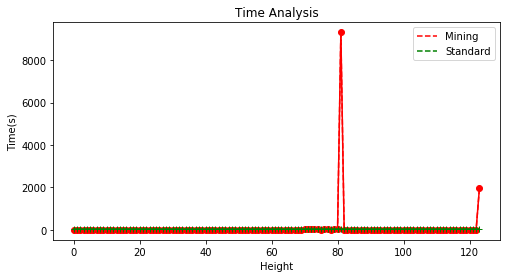

In [9]:
## Start mining
import random
import sys
import os
from datetime import datetime
from multiprocessing import Process, Pool, Queue, Manager

epochs = 100
blocks = []
errors = [0]
errors_sum = 0
pre_hash = '0'
height = 1
max_nounce = sys.maxsize

# 100 blocks
nodes_numbers = [0,5,12,12,15,7,8,9,12,15,13,15,4,6,8,10,7,16,13,2,4,3,12,16,5,11,13,16,14,14,6,7,
                 5,12,12,15,7,8,9,12,15,13,15,4,6,8,10,7,16,13,2,4,3,12,16,5,11,13,16,14,14,6,7,
                 5,12,12,15,7,8,9,12,15,13,15,4,6,8,10,7,16,13,2,4,3,12,16,5,11,13,16,14,14,6,7,
                 5,12,12,15,7,8,9,12,15,13,15,4,6,8,10,7,16,13,2,4,3,12,16,5,11,13,16,14,14,6,7]

def long_time_task(i, queue, start, height, pre_hash, merkle, DIFFICULTY):
#     print('Run task %s (%s)...' % (i, os.getpid()))  
    start_time = datetime.now()
    while queue.empty():
#         print("process: %s nounce: %s" % (i, start))
        block = Block(height, pre_hash, merkle, start, [])
        if int(block.getHash(),16) < DIFFICULTY:
            block.printJSON()
            queue.put(start)
            break
        else:
            start += 1
#     end_time = datetime.now()
#     duration = end_time - start_time
#     duration = duration.total_seconds()
#     print(duration)
    
while height < len(nodes_numbers):
    print('Epoch %s, Parent process %s, mining...' % (height, os.getpid()))
    merkle = sha1(random.random())
    nodes_number = nodes_numbers[height]
    unit_nounce = max_nounce // nodes_number
    p = Pool()
    queue = Manager().Queue()
    start_time = datetime.now()

    for i in range(nodes_number):
        start = i * unit_nounce # nounce
        p.apply_async(long_time_task, args = (i, queue, start, height, pre_hash, merkle, DIFFICULTY))  
    p.close()
    p.join()
    
    end_time = datetime.now()
    duration = end_time - start_time
    duration = duration.total_seconds()
    print('duration time: %s' % duration)
    
    block = Block(height, pre_hash, merkle, queue.get(True), [])
    block.duration = duration
    blocks.append(block)
    error = 60 - duration
    errors.append(error)
    errors_sum += error
    
    print('errors', errors, "errors_sum", errors_sum)
    DIFFICULTY = adjustmentDifficulty2(DIFFICULTY,height)

    height += 1
    pre_hash = block.getHash()

visualization(blocks)

In [149]:
from datetime import datetime
import time
start_time = datetime.now()
time.sleep(2)
end_time = datetime.now()
a = end_time - start_time
a.total_seconds()

2.005374

In [150]:
from multiprocessing import Process, Pool
import os

def run_proc(name):
    print('Run child process %s (%s)...' % (name, os.getpid()))
    
print('Parent process %s.' % os.getpid())
p = Process(target=run_proc, args=('test',))
print('Child process will start.')
p.start()
p.join()
print('Child process end.')

Parent process 6145.
Child process will start.
Child process end.


In [67]:
from multiprocessing import Pool
import os, time, random

def long_time_task(name):
    print('Run task %s (%s)...' % (name, os.getpid()))
    start = time.time()
    time.sleep(random.random() * 3)
    end = time.time()
    print('Task %s runs %0.2f seconds.' % (name, (end - start)))

print('Parent process %s.' % os.getpid())
p = Pool(8)
for i in range(8):
    p.apply_async(long_time_task, args=(i,))
print('Waiting for all subprocesses done...')
p.close()
p.join()
print('All subprocesses done.')

Parent process 6145.
Run task 2 (11449)...
Run task 0 (11447)...
Run task 3 (11450)...
Run task 1 (11448)...
Run task 4 (11451)...
Run task 6 (11453)...
Run task 5 (11452)...
Run task 7 (11454)...
Task 6 runs 0.07 seconds.
Waiting for all subprocesses done...
Task 2 runs 0.50 seconds.
Task 5 runs 0.57 seconds.
Task 3 runs 0.62 seconds.
Task 0 runs 0.87 seconds.
Task 1 runs 1.03 seconds.
Task 7 runs 2.76 seconds.
Task 4 runs 3.00 seconds.
All subprocesses done.


In [11]:
from multiprocessing import Process, Queue
import os, time, random

# 写数据进程执行的代码:
def write(q):
    print('Process to write: %s' % os.getpid())
    for value in ['A', 'B', 'C']:
        print('Put %s to queue...' % value)
        q.put(value)
        time.sleep(random.random())

# 读数据进程执行的代码:
def read(q):
    print('Process to read: %s' % os.getpid())
    while True:
        value = q.get(True)
        print('Get %s from queue.' % value)

# 父进程创建Queue，并传给各个子进程：
q = Queue()
pw = Process(target=write, args=(q,))
pr = Process(target=read, args=(q,))
# 启动子进程pw，写入:
pw.start()
# 启动子进程pr，读取:
pr.start()
# 等待pw结束:
pw.join()
# pr进程里是死循环，无法等待其结束，只能强行终止:
pr.terminate()

Process to write: 12493
Put A to queue...
Process to read: 12494
Get A from queue.
Put B to queue...
Get B from queue.
Put C to queue...
Get C from queue.


In [42]:
from multiprocessing import Pipe, Process

def worker(conn):
    print(conn.recv())
    conn.send("sent from child process")

conn1, conn2 = Pipe()
process = Process(target=worker, args=[conn2])
process.start()

conn1.send("sent from main process")
print(conn1.recv())


sent from main process
sent from child process


In [47]:
import sys
print(sys.maxsize)

9223372036854775807


In [10]:
import math
math.log2(8)

3.0